# Minimum time control of a lateral nonlinear model of a quadcopter


A planar model of the motion of a quadcopter is

$$\left[\begin{array}{c}\dot{y} \\ \dot{z} \\ \dot{v}_{y} \\ \dot{v}_{z} \\ 
\dot{\theta}\end{array}\right]=\left[\begin{array}{c}v_{y} \\ v_{z} \\ \sin 
(\theta) T_{r} \\ \cos (\theta) T_{r}-g \\ \omega\end{array}\right]$$

where: $y$, $z$ are the lateral and vertical displacements, respectively; 
$v_y$, $v_z$ are the lateral and vertical speeds; $\theta$, $\omega$ are the 
pitch angle and the normalized (by the moment of inertia) pitch rate, considered 
here to be a control input; and $T$, $g$ are the normalized (by the mass) controlled 
thrust and the gravitational constant $g=9.8$. If we fix $T_{r}=\frac{g}{\cos 
(\theta)}$, i.e., make $v_{z}=0$ we obtain the  lateral dynamics of the system

$$\left[\begin{array}{c}\dot{y} \\ \dot{v}_{y} \\ \dot{\theta}\end{array}\right]=\left[\begin{array}{c}v_{y} 
\\ \tan (\theta) g \\ w\end{array}\right].$$

The normalized pitch rate is subject to the following constraint:

$$|w| \ \le \ M.$$

It is assumed that $\theta(t) \in\left(-\frac{\theta}{2}, \frac{\theta}{2}\right)$ 
for every $t$. The goal of this live script is to is find a minimum time manoeuvre 
in the lateral direction from rest to rest at a distance $L$ apart, i.e., from 
$\left(y(0), v_{y}(0), \theta(0)\right)=(0,0,0)$ to $\left(y(T), v_{y}(T), \theta(T)\right)=(L, 
0,0)$, where $T$ is the optimal time. 

The Hamiltonian of the model is 

$$H=1+\left[\begin{array}{lll}\lambda_{y} & \lambda_{v} & \lambda_{\theta}\end{array}\right]\left[\begin{array}{c}v_{y} 
\\ \tan (\theta) g \\ w\end{array}\right].$$

Also, the optimality conditions, are

$$\left[\begin{array}{c}\dot{\lambda}_{y} \\ \dot{\lambda}_{v} \\ \dot{\lambda}_{\theta}\end{array}\right]=\left[\begin{array}{c}-\frac{\partial}{\partial 
y} H \\ -\frac{\partial}{\partial v_{y}} H \\ -\frac{\partial}{\partial \theta} 
H\end{array}\right]=\left[\begin{array}{c}0 \\ -\lambda_{y}(t) \\ -\frac{g}{\cos 
(\theta)^{2}}\end{array}\right] \rightarrow\left[\begin{array}{c}\lambda_{y}(t)=\lambda_{y}(0), 
t \in[0, T] \\ \lambda_{v}(t)=\underbrace{b}_{\lambda_{v}(0)}+t \underbrace{a}_{-\lambda_{y}(0)}, 
t \in[0, T] \\ \dot{\lambda}_{\theta}(t)=-\frac{g \lambda_{v}}{\cos (\theta)^{2}} 
\lambda_{v}(t), \quad t \in[0, T]\end{array}\right]$$

$$w = \text{argmin}_{w:|w|\leq M}H=\left\{\begin{array}{c}& -M \text{ if }\lambda_\theta 
\geq 0 \\ & M \text{ if }\lambda_\theta < 0  \end{array}\right.$$

From the optimality conditions, it is noted that $\dot{\lambda}_{\theta}$, 
can only change sign once, since $\theta \in \ (-\frac{\pi}{2},\frac{\pi}{2})$. 
So $\lambda _{\theta}$ can changes sign twice. So  the form of $w$ is the following

$$w = \left\{\begin{array}{c} &M \text{ if }t \in [0,t_1) \\ & -M \text{ if }t \in [t_1,t_2) \\ & M \text{ if } t \in [t_2,T]  \end{array} \right.$$

Similarly to $w$ we define $\theta$. Since the condition $\theta (T)=0$ must 
hold, we reach the relation $T=2(t_2-t_1)$. By integrating the equation $\dot{v}_{y}=\tan 
(\theta) g$, which is parameterized by $t_1$ and $t_2$ and applying the $0=v_{y}(T)=v_{y}\left(2\left(t_{2}-t_{1}\right)\right)$ 
terminal condition, we reach  the following format for $v_y$.

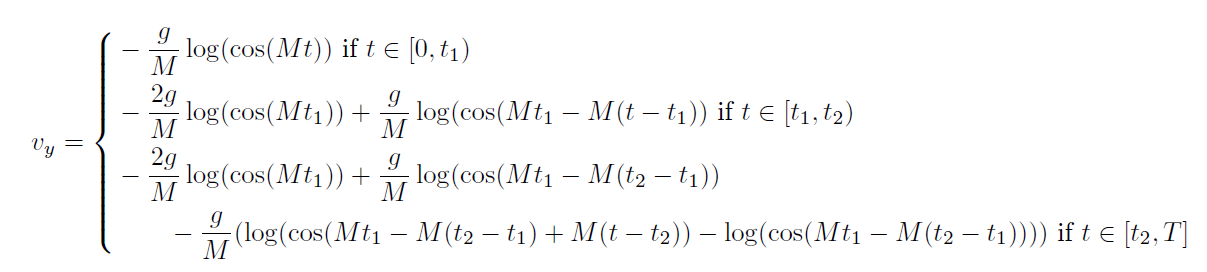

Imposing $0=v_{y}(T)=v_{y}\left(2\left(t_{2}-t_{1}\right)\right)$, noticing 
that the second and third term in the expression for $v_y(T)$ can be combined 
that the third term equals zero since $T = 2(t_2- t_1)$ we obtain

$$-2 \log \left(\cos \left(M t_{1}\right)\right)+2 \log \left(\cos \left(M 
t_{1}-M\left(t_{2}-t_{1}\right)\right)\right)=0$$

This holds if $t_{1}=-\left(2 t_{1}-t_{2}\right)$ or $t_{2}=3 t_{1}$. Given 
$t_{1}$ we obtain $L$ by integrating $\dot{y}=v_{y}$ from 0 to $T=2\left(t_{2}-t_{1}\right)=4 
t_{1}$. Note that we have parameterized the optimal solutions in terms of a 
single parameter: $t_1$ which must be chosen such that $y(T)=L$.

The function `mintimequad` takes as input the constraint $M$ and the length 
$L$ and computes the optimal time $T$, the lateral velocity $v_y$, the lateral 
displacement $y$, the pitch angle $\theta$ and the normalized pitch rate $w$. 
It does so by searching for the appropriate value of $t_1$ such that $y(T)=L$ 
using the bisection method (since the larger $t_1$ the larger $y(T)$).



In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [ ]:
def mintimequad(L,M):

    # find t1 with bisection method
    t1max = 1
    t1min = 0
    t1_ = (t1max+t1min)/2
    while(1):
        # compute L by integrating vy from 0 to T
        tau = 0.001
        T = 4*t1_
        if ((np.floor(T/tau)) % 2) == 0:
            N = np.floor(T/tau)
        else:
            N = np.floor(T/tau)+1
        
        a = 4*np.kron( np.ones((1,int(N/2-1))),np.array([1, 0]))+2*np.kron(np.ones((1,int(N/2-1))),np.array([0, 1]))
        b = np.hstack((np.array([1]),a[0]))

        coefsimpsonrule = tau/3*np.hstack((b,np.array([4,1])))
        
        yT = coefsimpsonrule@fvy(tau*np.arange(N+1),t1_,M).reshape(int(N+1),1) # given t1 vy is knwon and integrating it gives y
        if np.linalg.norm(yT-L) < 0.001:                                       # then we can check if y(T) than L or not and depending on thatchose which values of t1 to consider next
            break
        else:
            if yT>L:
                t1max = t1_
            else:
                t1min = t1_
            
            t1_ = (t1max+t1min)/2

    tvec = tau*np.arange(1+int(np.floor(T/tau)))
    vy = fvy(tvec,t1_,M)
    theta = ftheta(tvec,t1_,M)
    w = fw(tvec,t1_,M)
    y = np.zeros((1,int(np.floor(T/tau))+1))
    for i in range(int(np.floor(T/tau))):
        y[0,i+1] = coefsimpsonrule[:i+1].reshape(1,i+1)@fvy(tau*np.arange(i+1),t1_,M).reshape(i+1,1)
    
    return y, vy, theta, w, T

In [ ]:
# outputs w given the value of t1 at points tvec with the form given above (fully determined by t1 besides M)
def fw(tvec,t1,M):
    t2 = 3*t1
    T = 4*t1
    avec = np.zeros(tvec.shape[0])
    for i in range(tvec.shape[0]):
        t = tvec[i]
        if t<t1:
            a = M
        else:
            if t < t2:
                a = -M
            else:
                a = M
        avec[i] = a
    return avec

In [ ]:
#outputs theta given the value of t1 at points tvec with the form given above (fully determined by t1 besides M)
def ftheta(tvec,t1,M):
    t2 = 3*t1
    T = 4*t1
    avec = np.zeros(tvec.shape[0])
    for i in range(tvec.shape[0]):
        t = tvec[i]
        if t<t1:
            a = M*t
        else:
            if t < t2:
                a = M*t1-M*(t-t1)
            else:
                a = M*t1-M*(t2-t1)+M*(t-t2)
            
        avec[i] = a
    
    return avec

In [ ]:
# outputs vy given the value of t1 at points tvec with the form given above (fully determined by t1 besides M)
def fvy(tvec,t1,M):
    t2 = 3*t1
    T = 4*t1
    g = 9.8
    avec = np.zeros(tvec.shape[0])
    for i in range(tvec.shape[0]):
        t = tvec[i]
        if t<t1:
            a = -g/M*np.log(np.cos(M*t))
        else:
            if t < t2:
                a = -2*g/M*np.log(np.cos(M*t1)) + g/M*np.log(np.cos(M*t1-M*(t-t1)))
            else:
                a = -2*g/M*np.log(np.cos(M*t1))+2*g/M*np.log(np.cos(M*t1-M*(t2-t1)))-g/M*np.log(np.cos(M*t1-M*(t2-t1)+M*(t-t2) ))
        avec[i] = a
    
    return avec

In [ ]:
# define input parameters and call the function
L = 0.1
M = 0.5
y, vy, theta, w, T  = mintimequad(L,M)
tau  = 0.001
tvec = tau*np.arange(int(np.floor(T/tau))+1)

In [ ]:
f = plt.figure()
plt.plot(tvec,y[0])
plt.xlabel('time t')
plt.ylabel('y');

In [ ]:
f = plt.figure()
plt.plot(tvec,vy)
plt.xlabel('time t')
plt.ylabel('vy');

In [ ]:
f = plt.figure()
ax = f.gca() 
plt.plot(tvec,theta)
plt.xlabel('time t')
plt.ylabel('theta');

In [ ]:
f = plt.figure()
ax = f.gca() 
plt.plot(tvec,w)
plt.xlabel('time t')
plt.ylabel('w');